In [ ]:
from google.colab import files
uploaded = files.upload()


Saving tested.csv to tested.csv


**NeuroNexus Innovations Internship**

> **TASK-1: TITANIC SURVIVAL PREDICTION**



***Importing all the libraries***

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import plotly.offline as pyo
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report

A

**Reading the csv file (dataset)**

In [ ]:
titanic = pd.read_csv('tested.csv')

In [ ]:
titanic.shape

(418, 12)

**Data Analysis**

In [ ]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
357,1249,0,3,"Lockyer, Mr. Edward",male,NaN,0,0,1222,7.8792,NaN,S
252,1144,0,1,"Clark, Mr. Walter Miller",male,27.0,1,0,13508,136.7792,C89,C
191,1083,0,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S
93,985,0,3,"Guest, Mr. Robert",male,NaN,0,0,376563,8.0500,NaN,S
30,922,0,2,"Louch, Mr. Charles Alexander",male,50.0,1,0,SC/AH 3085,26.0000,NaN,S


In [ ]:
# Display column names and information about the dataset
print(titanic.columns,'\n\n\n\n')

titanic.info()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Display basic statistics of the numerical columns in the dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Data Visualization**

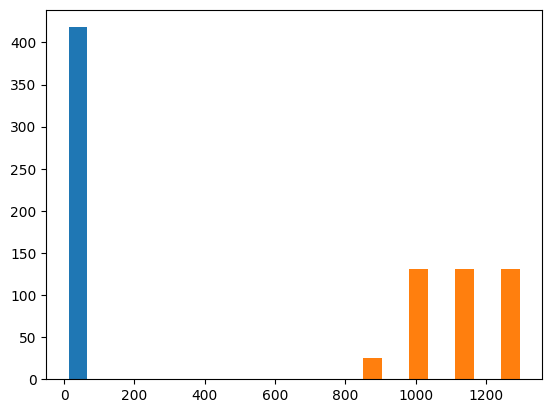

In [ ]:
plt.hist(titanic[['Survived','PassengerId']]);

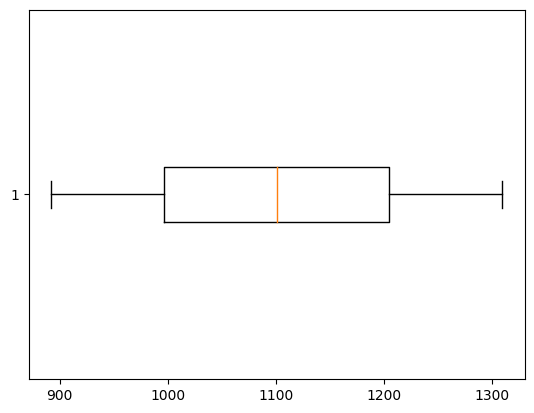

In [ ]:
plt.boxplot(titanic['PassengerId'], vert=False);

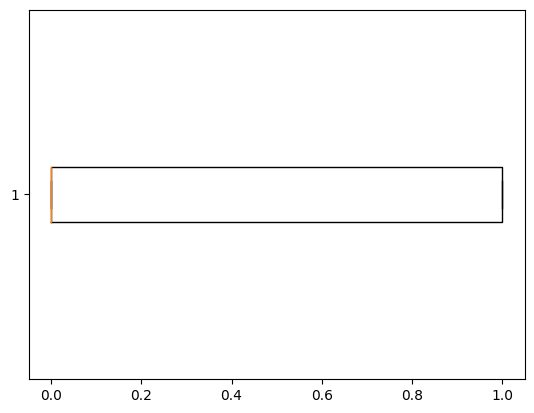

In [ ]:
plt.boxplot(titanic['Survived'], vert=False);

In [ ]:
titanic['Survived'].describe()

count    418.000000
mean       0.363636
std        0.481622
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

**Data Cleaning**

In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Checking for missing values and handling them
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Checks for missing values in the dataset.
Fills missing values in the 'Age' and 'Fare' columns with their respective medians.
Fills missing values in the 'Cabin' column with 'Unknown'.

In [ ]:
# Handling missing values by filling them with the median for specific columns
columns = ['Age', 'Fare']
for col in columns:
    titanic[col].fillna(titanic[col].median(), inplace=True)

titanic['Cabin'].fillna('Unknown', inplace=True)

In [ ]:
#checking duplicate values

dup = titanic.duplicated().sum()
print("The number of duplicated values in the dataset are: ", dup)

The number of duplicated values in the dataset are:  0


In [ ]:
#Checking if there are any typos

for col in titanic.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(titanic[col].unique())
    print('\n', '-'*60, '\n')

Name of Column: Name
['Kelly, Mr. James' 'Wilkes, Mrs. James (Ellen Needs)'
 'Myles, Mr. Thomas Francis' 'Wirz, Mr. Albert'
 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)'
 'Svensson, Mr. Johan Cervin' 'Connolly, Miss. Kate'
 'Caldwell, Mr. Albert Francis'
 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)' 'Davies, Mr. John Samuel'
 'Ilieff, Mr. Ylio' 'Jones, Mr. Charles Cresson'
 'Snyder, Mrs. John Pillsbury (Nelle Stevenson)' 'Howard, Mr. Benjamin'
 'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)'
 'del Carlo, Mrs. Sebastiano (Argenia Genovesi)' 'Keane, Mr. Daniel'
 'Assaf, Mr. Gerios' 'Ilmakangas, Miss. Ida Livija'
 'Assaf Khalil, Mrs. Mariana (Miriam")"' 'Rothschild, Mr. Martin'
 'Olsen, Master. Artur Karl' 'Flegenheim, Mrs. Alfred (Antoinette)'
 'Williams, Mr. Richard Norris II'
 'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)'
 'Robins, Mr. Alexander A' 'Ostby, Miss. Helene Ragnhild'
 'Daher, Mr. Shedid' 'Brady, Mr. John Bertram' 'Samaan, Mr. Elias'
 'Louch, Mr. Charles Alexa

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        418 non-null    object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S


In [ ]:
# Creating a new feature of title from name column based on the pattern found above

titanic['Title'] = titanic['Name'].str.extract(r',\s(.*?)\.')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Dona', 'Mrs')
titanic['Title'] = titanic['Title'].replace(['Col', 'Rev', 'Dr'], 'Rare')

In [ ]:
# Creating additional features: 'Age_Group' and 'Family'
bins = [-np.inf, 17, 32, 45, 50, np.inf]
labels = ["Children", "Young", "Mid-Aged", "Senior-Adult", 'Elderly']
titanic['Age_Group'] = pd.cut(titanic['Age'], bins=bins, labels=labels)

# Generting another new feature of family size
titanic['Family'] = titanic['SibSp'] + titanic['Parch']

# Dropping non-essential columns
titanic = titanic.drop(columns=['Name', 'Ticket'])
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Age_Group,Family
0,892,0,3,male,34.5,0,0,7.8292,Unknown,Q,Mr,Mid-Aged,0
1,893,1,3,female,47.0,1,0,7.0000,Unknown,S,Mrs,Senior-Adult,1
2,894,0,2,male,62.0,0,0,9.6875,Unknown,Q,Mr,Elderly,0
3,895,0,3,male,27.0,0,0,8.6625,Unknown,S,Mr,Young,0
4,896,1,3,female,22.0,1,1,12.2875,Unknown,S,Mrs,Young,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,27.0,0,0,8.0500,Unknown,S,Mr,Young,0
414,1306,1,1,female,39.0,0,0,108.9000,C105,C,Mrs,Mid-Aged,0
415,1307,0,3,male,38.5,0,0,7.2500,Unknown,S,Mr,Mid-Aged,0
416,1308,0,3,male,27.0,0,0,8.0500,Unknown,S,Mr,Young,0


In [ ]:
# Chaning the positon of columns to place them right after their parent column

col_to_move = titanic.pop('Age_Group')
titanic.insert(4, 'Age_Group', col_to_move)

col_to_move = titanic.pop('Family')
titanic.insert(7, 'Family', col_to_move)

titanic['Age_Group'] = titanic['Age_Group'].astype('object')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age_Group,Age,SibSp,Family,Parch,Fare,Cabin,Embarked,Title
0,892,0,3,male,Mid-Aged,34.5,0,0,0,7.8292,Unknown,Q,Mr
1,893,1,3,female,Senior-Adult,47.0,1,1,0,7.0000,Unknown,S,Mrs
2,894,0,2,male,Elderly,62.0,0,0,0,9.6875,Unknown,Q,Mr
3,895,0,3,male,Young,27.0,0,0,0,8.6625,Unknown,S,Mr
4,896,1,3,female,Young,22.0,1,2,1,12.2875,Unknown,S,Mrs


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Family,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.839713,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.703770,0.896760,1.519072,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,10.000000,9.000000,512.329200


In [ ]:
titanic.describe(include = 'O')

,Sex,Age_Group,Cabin,Embarked,Title
count,418,418,418,418,418
unique,2,5,77,3,5
top,male,Young,Unknown,S,Mr
freq,266,257,327,270,240


In [ ]:
titanic.groupby('Sex')[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Family', 'Fare']].mean()

,Survived,Pclass,Age,SibSp,Parch,Family,Fare
Sex,,,,,,,
female,1.0,2.144737,29.734145,0.565789,0.598684,1.164474,49.747699
male,0.0,2.334586,29.522218,0.379699,0.274436,0.654135,27.478728


In [ ]:
titanic.groupby('Embarked')[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Family', 'Fare']].mean()

,Survived,Pclass,Age,SibSp,Parch,Family,Fare
Embarked,,,,,,,
C,0.392157,1.794118,33.220588,0.421569,0.382353,0.803922,66.259765
Q,0.521739,2.869565,28.108696,0.195652,0.021739,0.217391,10.957700
S,0.325926,2.340741,28.485185,0.500000,0.459259,0.959259,28.179413


In [ ]:
import plotly.express as px

# Assuming titanic is your DataFrame
survived_counts = titanic['Survived'].value_counts()

fig_surv_perc = px.pie(
    titanic,
    names=survived_counts.index,
    values=survived_counts.values,
    title='Distribution of Survived',
    hole=0.2,
    color_discrete_sequence=px.colors.sequential.Plasma  # Change the color sequence
)

fig_surv_perc.update_traces(textinfo='percent+label')
fig_surv_perc.update_layout(
    legend_title_text='Categories:',
    legend=dict(orientation="h", yanchor="bottom", y=1.02)
)
fig_surv_perc.show()

In [ ]:
pclass_counts = titanic.Pclass.value_counts()

fig_pclass_perc = px.pie(titanic,
                         names= pclass_counts.index,
                         values = pclass_counts.values,
                         title=f'Distribution of Pclass',
                         hole=0.2,
                         color_discrete_sequence=px.colors.sequential.Plasma)

fig_pclass_perc.update_traces(textinfo='percent+label')
fig_pclass_perc.update_layout(legend_title_text='Categories:', legend=dict(orientation="h", yanchor="bottom", y=1.02))
fig_pclass_perc.show()

In [ ]:
fig_sex_count = px.histogram(titanic,
                             x = 'Sex',
                             color = 'Sex',
                             color_discrete_sequence=px.colors.sequential.Plasma)

fig_sex_count.update_layout(title_text='Count of different Sex',
                            xaxis_title='Sex',
                            yaxis_title='Count',
                            plot_bgcolor = 'lightgreen')

fig_sex_count.show()

fig_sex_perc = px.pie(titanic,
                      names= 'Sex',
                      title=f'Distribution of Sex',
                      hole=0.2,
                      color_discrete_sequence=px.colors.sequential.Plasma)

fig_sex_perc.update_traces(textinfo='percent+label')
fig_sex_perc.update_layout(legend_title_text='Categories:',
                           legend=dict(orientation="h", yanchor="bottom", y=1.02)
                          )
fig_sex_perc.show()

In [ ]:
fig_age = px.histogram(titanic, x='Age', nbins=30, histnorm='probability density')

fig_age.update_traces(marker=dict(color='#440154'), selector=dict(type='histogram'))

fig_age.update_layout(title='Distribution of Age',
                      title_x=0.5, title_pad=dict(t=20),
                      title_font=dict(size=20),
                      xaxis_title='Age',
                      yaxis_title='Probability Density',
                      xaxis=dict(showgrid=False),
                      yaxis=dict(showgrid=False),
                      bargap=0.02,
                      plot_bgcolor = 'red')
fig_age.show()

In [ ]:
fig_fare = px.histogram(titanic, x='Fare', nbins=30, histnorm='probability density')

fig_fare.update_traces(marker=dict(color='#440154'), selector=dict(type='histogram'))

fig_fare.update_layout(title='Distribution of Fare',
                       title_x=0.5,
                       title_pad=dict(t=20),
                       title_font=dict(size=20),
                       xaxis_title='Fare',
                       yaxis_title='Probability Density',
                       xaxis=dict(showgrid=False),
                       yaxis=dict(showgrid=False),
                       bargap=0.02,
                       plot_bgcolor = 'lightblue')
fig_fare.show()


In [ ]:
fig_embarked_count = px.histogram(titanic,
                                  x = 'Embarked',
                                  color = 'Embarked',
                                  color_discrete_sequence=px.colors.sequential.Viridis)

fig_embarked_count.update_layout(title_text='Count of different Embarked',
                                 xaxis_title='Embarked',
                                 yaxis_title='Count',
                                 plot_bgcolor = 'brown')
fig_embarked_count.show()

fig_embarked_perc = px.pie(titanic,
                           names= 'Embarked',
                           title=f'Distribution of Embarked',
                           hole=0.2,
                           color_discrete_sequence = px.colors.sequential.Viridis)

fig_embarked_perc.update_traces(textinfo='percent+label')

fig_embarked_perc.update_layout(legend_title_text='Categories:',
                                legend = dict(orientation="h", yanchor="bottom", y=1.02))
fig_embarked_perc.show()

In [ ]:
fig_title_count = px.histogram(titanic,
                               x = 'Title',
                               color = 'Title',
                               color_discrete_sequence=px.colors.sequential.Viridis)

fig_title_count.update_layout(title_text='Count of different Title',
                              xaxis_title='Title',
                              yaxis_title='Count',
                              plot_bgcolor = 'lightyellow')
fig_title_count.show()

fig_title_perc = px.pie(titanic,
                        names= 'Title',
                        title=f'Distribution of Title',
                        hole=0.2,
                        color_discrete_sequence=px.colors.sequential.Viridis)

fig_title_perc.update_traces(textinfo='percent+label')
fig_title_perc.update_layout(legend_title_text='Categories:',
                             legend=dict(orientation="h", yanchor="bottom", y=1.02))
fig_title_perc.show()

In [ ]:
fig_pclass_surv = px.histogram(titanic,
                               x = 'Pclass',
                               barmode = 'group',
                               color = 'Survived',
                               color_discrete_sequence = px.colors.sequential.Viridis)

fig_pclass_surv.update_layout(title = 'Survival according to passenger classes',
                              plot_bgcolor = 'pink')
fig_pclass_surv.show()

In [ ]:
fig_pclass_surv = px.histogram(titanic,
                               x = 'Sex',
                               barmode = 'group',
                               color = 'Survived',
                               color_discrete_sequence=px.colors.sequential.Viridis)

fig_pclass_surv.update_layout(title = 'Survival according to gender',
                              plot_bgcolor = 'lightblue')
fig_pclass_surv.show()

In [ ]:
fig_embarked_surv = px.histogram(titanic,
                                 x = 'Age_Group',
                                 barmode = 'group',
                                 color = 'Survived',
                                 color_discrete_sequence=px.colors.sequential.Viridis)

fig_embarked_surv.update_layout(title = 'Survival according to age groups',
                                plot_bgcolor = 'lightyellow')
fig_embarked_surv.show()

In [ ]:
fig_family_surv = px.histogram(titanic,
                               x = 'Family',
                               barmode = 'group',
                               color = 'Survived',
                               color_discrete_sequence=px.colors.sequential.Viridis)

fig_family_surv.update_layout(title = 'Survival according to number of family members',
                              plot_bgcolor = 'darksalmon')
fig_family_surv.show()

In [ ]:
fig_embarked_surv = px.histogram(titanic,
                                 x = 'Embarked',
                                 barmode = 'group',
                                 color = 'Survived',
                                 color_discrete_sequence=px.colors.sequential.Viridis)

fig_embarked_surv.update_layout(title = 'Survival according to embarked',
                                plot_bgcolor = 'olive')
fig_embarked_surv.show()

**Choosing The Model**

In [ ]:
# Multivariate Analysis

grouped_data = titanic.groupby(['Age', 'Sex', 'Survived']).agg({'Fare': 'mean'}).reset_index()

fig = px.line(grouped_data,
              x='Age',
              y='Fare',
              color='Survived',
              facet_col='Sex',
              facet_col_wrap=2,
              labels={'Fare': 'Fare', 'Survived': 'Survived'},
              title='12. Relation of age and gender with fare')

fig.update_layout(hovermode='x unified', plot_bgcolor = 'aqua')
fig.update_xaxes(title_text='Age')
fig.update_yaxes(title_text='Fair', row=1, col=1)
fig.show()

In [ ]:
# 1. Label Encoding
# Labeling the ordinal variables

le = LabelEncoder()
cols = ['Sex', 'Age_Group', 'Cabin', 'Embarked', 'Title']

for col in cols:
    titanic[col] = le.fit_transform(titanic[col])

In [ ]:
# 2. Class Imbalanace
# Checking the class count for target variable

titanic.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [ ]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age_Group    418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Family       418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int64  
 10  Embarked     418 non-null    int64  
 11  Title        418 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 39.3 KB
None


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Survived
Non-Null Count  Dtype
--------------  -----
418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [ ]:
# Using the SMOTE technique to handle class imbalance

smote = SMOTE(random_state = 42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [ ]:
# 3. Splitting into training and testing
# Splitting the dataset into training and testing parts

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size = 0.3, random_state = 42)

In [ ]:
# Feature Scaling
# Doing feature scaling by StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
# Building the models

lr = LogisticRegression()
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()

lr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
gbc.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)
gbc_pred = gbc.predict(X_test_scaled)

In [ ]:
# Evaluating the models by generating classification report and cross validation scores

lr_report = classification_report(y_test, lr_pred)
lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')

rf_report = classification_report(y_test, rf_pred)
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

gbc_report = classification_report(y_test, gbc_pred)
gbc_scores = cross_val_score(gbc, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [ ]:
print('The classification report of Logistic Regression is below : ', '\n\n\n', lr_report)
print(f"Logistic Regression Mean Cross-Validation Score: {lr_scores}")

The classification report of Logistic Regression is below :  


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        82

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

Logistic Regression Mean Cross-Validation Score: [1. 1. 1. 1. 1.]


In [ ]:
print('\n', '='*100, '\n')
print('The classification report of Random Forest is below : ', '\n\n\n', rf_report)
print(f"Random Forest Mean Cross-Validation Score: {rf_scores}")



The classification report of Random Forest is below :  


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        82

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

Random Forest Mean Cross-Validation Score: [1. 1. 1. 1. 1.]


In [ ]:
print('\n', '='*100, '\n')
print('The classification report of Gradient Bossting Classifier is below : ', '\n\n\n', rf_report)
print(f"Gradient Boosting Classifier Mean Cross-Validation Score: {gbc_scores}")



The classification report of Gradient Bossting Classifier is below :  


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        82

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

Gradient Boosting Classifier Mean Cross-Validation Score: [1. 1. 1. 1. 1.]
